# Lab 8: Supervised Learning  

In this lab, we will keep working on supervised learning. We will first learn how to train decision trees and we will see that doing this using `sklearn` is not much different from running kNN algorithm.

## Lab 8.A: Decision Trees (50% of grade)

The following code is copied from http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py. You should be able to run the code without error messages.

#### Question 1 in the comment

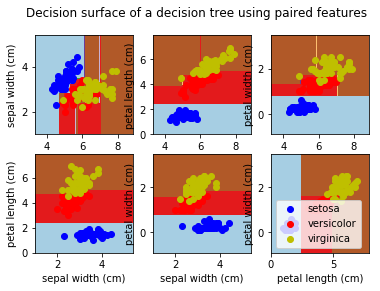

In [1]:
import numpy as np #import numpy
import matplotlib.pyplot as plt #import matplotlib

from sklearn.datasets import load_iris #import iris data
from sklearn.tree import DecisionTreeClassifier #import decision tree classifier

# Parameters
#set parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris() #load data

#use enumerate to iterate through a list
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair] # use pair to indicate what attributes to use
    y = iris.target # get label data

    # Train
    clf = DecisionTreeClassifier() # create the decision tree classifier
    clf.fit(X, y) # train the decision tree classifier on our data 

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    # pairidx is the order of pair in the list of pairs of attributes, starting from 0.  
    # In the current figure, create and return an 2 x 3 Axes, at position (pairidx + 1) of a (virtual) grid of 2 by 3 axes. 
    # Indexes go from 1 to nrows * ncols, incrementing in row-major order.

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    # x_min = min of the first attribute - 1, x_max = max of the first attribute + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # y_min = min of the second attribute - 1, y_max = max of the second attribute + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    # np.arange(x_min, x_max,h) returns an array starting at x_min, ending at x_max with steps plot_step, 
    # similar for np.arange(y_min,y_max,h)
    # np.meshgrid Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, 
    # given one-dimensional coordinate arrays x1, x2,..., xn.  
    # here, we pass in two 1-dimensional arrays: np.arange(x_min,x_max,plot_step) with length N1, np.arange(y_min,y_max,plot_step) with length N2, then
    #np.meshgrid returns two N2 x N1 arrays XX and YY  such that the pairing of the corresponding element in each matrix 
    #gives the x and y coordinates of a point in the grid.


    # xx.ravel() and yy.ravel() return a contiguous flattened array for xx and yy respectively
    # np.c_ puts xx.ravel() values in the first column and yy.ravel() values in the second column
    # clf.predict() predict label given the data we pass in, which is the matrix that has xx.ravel() in the first column and yy.ravel()
    # in the second column. Z stores the label values
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]]) # label x-axis
    plt.ylabel(iris.feature_names[pair[1]]) # label y-axis
    plt.axis("tight")

    # Plot the training points 
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired) #we scatter the training points using label and c to color them

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

For each pair of iris attributes, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples. Here, after training DecisionTreeClassifier on our data with selected pair of attributes, we use that classifier to plot the decision boundary for each type of flower in an axes with one attribute on the y-axis and another attribute on the x-axis and then scatter-plot our data onto that plotted decision boundary. For example, in the graph on the top left corner, the Decision Tree thinks Setosa flower should occupy the region on the right, Virginica flower should occupy the region on the left and Versicolor should occupy the small region in the lower-middle, and then we scatter-plot our data onto that decision boundary. As a result, it turns out that some Virginica ends up in the region of Versicolor. Similar analysis can be inferred from other plots

In [2]:
plt.close()

**Question 1**. Study the code and try to understand what is happening in each line. Explain what the images plotted by the code show.

**Question 2**. Train a decision tree on Iris data set using all 4 attributes. Before training, remember to reserve 50 randomly selected examples for test set and train on the remaining 100 examples. Use the default parameter values (no need to put anything in parenthesis in `DecisionTreeClassifier`). How long did it take to train the decision tree? Report the accuracy on the test set. Print the confusion matrix. Report the accuracy on the training set. Discuss if you are seeing any difference and why. Compare the accurracy with the accuracy you got with kNN. Report on the size of the resulting tree (how many nodes are there and what is the depth of the tree). Visualize the tree (consider using `sklearn.tree.export_graphviz`).

**Question 3**. Train a decision tree on Iris data, but this time play with the parameters. You can se the detailed list of different choices at http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier. Experiment with `criterion` (default is `gini`, try to train using `entropy`), `max_depth` (try to set it to 2, 3, 4), `min_samples_leaf` (default is 1, try with 5, 15). See if you can find a combination of parameters that improves accuracy on the test set. Report what you found.

#### Question 2

In [3]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

C:\Users\Hoang\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import itertools

The code below is to plot the confusion matrix!

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
import time

In [7]:
X1 = iris.data
y1 = iris.target

X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size = 0.33)
start = time.time()
predictor = DecisionTreeClassifier()
predictor.fit(X_train,y_train)
yhat = predictor.predict(X_test)
end = time.time()
accuracytest = predictor.score(X_test,y_test)
accuracytrain = predictor.score(X_train,y_train)
print 'accurary on training set = %f, accuracy on test set = %f, time = %f' % (accuracytrain, accuracytest, end-start)
matrix = metrics.confusion_matrix(y_test, yhat)
print metrics.classification_report(y_test, yhat)

accurary on training set = 1.000000, accuracy on test set = 0.960000, time = 0.006000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      0.93      0.93        15
          2       0.95      0.95      0.95        20

avg / total       0.96      0.96      0.96        50



Confusion matrix, without normalization
[[15  0  0]
 [ 0 14  1]
 [ 0  1 19]]


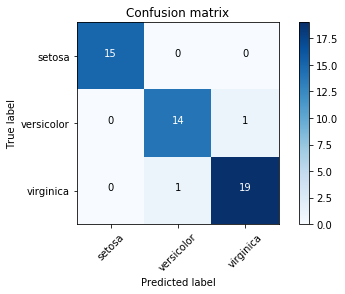

In [8]:
plt.figure()
plot_confusion_matrix(matrix,classes = iris.target_names)
plt.show()

It seems that our classifier gets confused between Versicolor and Virginica! Misclassify 2 of each type as another

Results with kNN

In [9]:
from sklearn import neighbors

In [10]:
Metric = ['euclidean', 'minkowski', 'cosine', 'chebyshev', 'canberra', 'braycurtis']
K = [1,3,5,15,25,50]
Weights = ['uniform', 'distance']
Combo = list(itertools.product(K,Weights, Metric))
highest = 0
chosen = ()
for c in Combo:
    k = c[0]
    weight = c[1]
    met = c[2]
    clf = neighbors.KNeighborsClassifier(k, weights = weight, metric = met)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    if accuracy > highest:
        highest = accuracy
        chosen = c
print 'k = %i, weights = %s, metrics = %s, accuracy = %f' % (chosen[0], chosen[1], chosen[2], highest)

k = 3, weights = uniform, metrics = cosine, accuracy = 1.000000


* It takes 0.001 seconds to build and train the decision tree, very fast! No doubt, Decision tree is the one of the 'cheapest' algorithm. 


* We got 100% accuracy on the training data, but 92% accuracy on the test data. The reason is probably because our dataset is of size 150, so after spliting, we only have 100 for training and 50 for testing. Those 100 training data may not be representative enough for the whole dataset, and as a result, we misclassify some flowers in the testing data. The solution is to use cross validation!

* The result is not as good as kNN, since in kNN we're able to achieve 96% accuracy with some best choices of combination

In [11]:
nodes = predictor.tree_.node_count
depth = predictor.tree_.max_depth
print 'number of nodes = %i, depth of tree = %i' % (nodes, depth)

number of nodes = 13, depth of tree = 4


In [12]:
from sklearn import tree
from IPython.display import Image
import pydotplus

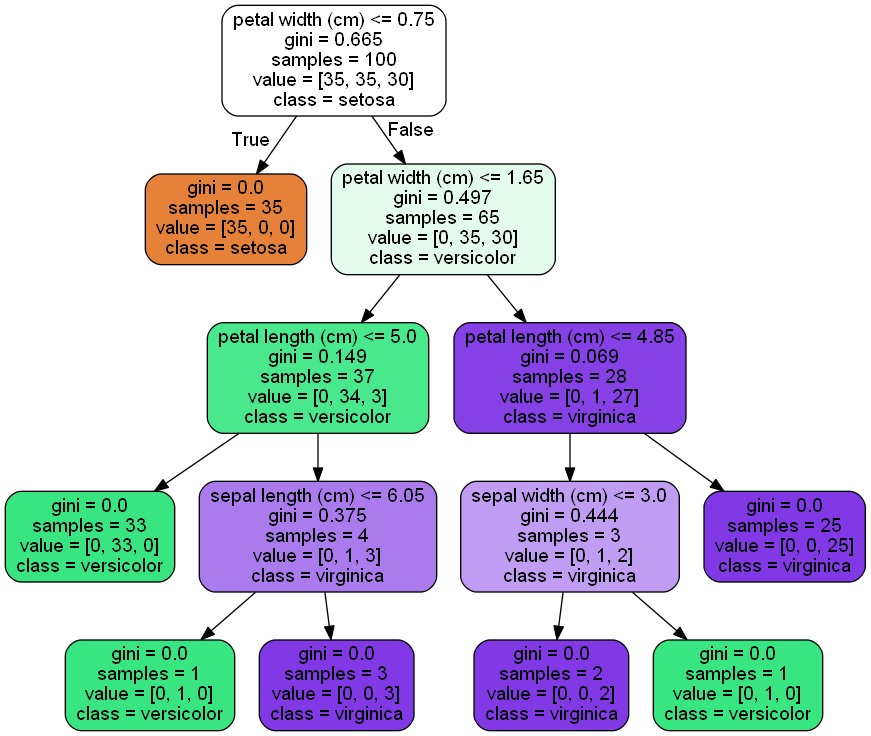

In [13]:
tree.export_graphviz(predictor, out_file = 'tree.dot', feature_names=iris.feature_names, class_names=iris.target_names, filled = True, rounded = True)
graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
Image(graph.create_png())

#### Question 3

In [14]:
criterion = ['gini', 'entropy']
max_depth = [2,3,4]
min_samples_leaf = [5,15]
combine = list(itertools.product(criterion,max_depth,min_samples_leaf))
print combine
print '\n'
for c in combine:
    estimator = DecisionTreeClassifier(criterion = c[0], max_depth = c[1], min_samples_leaf = c[2]).fit(X_train,y_train)
    yhat = estimator.predict(X_test)
    accuracytest = estimator.score(X_test,y_test)
    accuracytrain = estimator.score(X_train,y_train)
    nodes = estimator.tree_.node_count
    depth = estimator.tree_.max_depth
    print 'number of nodes = %i, depth of tree = %i' % (nodes, depth)
    print 'criterion: %s, max_depth = %i, min_samples_leaf = %i' % (c[0], c[1], c[2])
    print 'accurary on training set = %f, accuracy on test set = %f' % (accuracytrain, accuracytest)
    metrics.confusion_matrix(y_test, yhat)
    print metrics.classification_report(y_test, yhat)

[('gini', 2, 5), ('gini', 2, 15), ('gini', 3, 5), ('gini', 3, 15), ('gini', 4, 5), ('gini', 4, 15), ('entropy', 2, 5), ('entropy', 2, 15), ('entropy', 3, 5), ('entropy', 3, 15), ('entropy', 4, 5), ('entropy', 4, 15)]


number of nodes = 5, depth of tree = 2
criterion: gini, max_depth = 2, min_samples_leaf = 5
accurary on training set = 0.960000, accuracy on test set = 0.920000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.82      0.93      0.87        15
          2       0.94      0.85      0.89        20

avg / total       0.92      0.92      0.92        50

number of nodes = 5, depth of tree = 2
criterion: gini, max_depth = 2, min_samples_leaf = 15
accurary on training set = 0.960000, accuracy on test set = 0.920000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.82      0.93      0.87        15
          2       0.94      0.

None of our experiments do better than the default options! Even though we above try all different options, we get all the same answer! That means the options we give are below some threshold to achieve a better result. It may be because that we set max_depth too low or min_samples_leaf too high

## Lab 8.B. Doing supervised learning on churn data set (50 points)

In this part of the lab, you will be using kNN and decision trees on the problem of churn prediction. 

In [15]:
import pandas as pd
#data set from yhathq: http://blog.yhathq.com/posts/predicting-customer-churn-with-sklearn.html
dfchurn=pd.read_csv("https://raw.githubusercontent.com/CIS3715-temple-2018/CIS3715-temple-2018.github.io/master/churn.csv")
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


This is a dataset from a telecom company, of their customers. Based on the recorded attributes of these customers and their calling plans, we want to predict if a customer is likely to leave the company (the last column in the table). This is expensive for the company, as a lost customer means lost monthly revenue.

**Question 4**. Perform EDA on the data set to get an insight into the data, including answering what fraction of customers left the company, what are attributes about, what are their properties, how are attributes and the churn related. Prepare 1-2 page document summarizing the interesting aspects of the data.

**Question 5**. Train and test a kNN classifier. First, select 1,000 random customers and save them for testing. You can use the remaining ones for training. Then, you will need to decide what to do with the categorical attributes. The easiest is to simply ignore them, but it would reduce your accuracy. A better way (you have to try it) is to convert the categorical attributes to numbers. It is up to you to decide what distance measure to use, how to pick `k`, and make any other decision that will help you increase the accuracy. For example, it might help you to scale the attributes to the same range. Remember that any transformation you do on the training data needs to be repeated on the test data. Report on the best accuracy you are able to get (please do not forget to split the data into training and test before proceeding). Also report the confusion matrix. Provide a discussion of your choices.

**Question 6**. Train and test a decision tree. Do it on the sane traing-test split you used in *Question 5*. Your goal is to try to figure out the best way to train an accurate decision tree. Report on your findings. Compare your results with the kNN results.

**Question 7**. Lets assume you have to use your churn classifier to contact your existing customers and try try to prevent churn. The cost of each contact is \$10. Let us assume each contacted customer will decide to stay. Your profit in keeping a customer is \$30. Given your best decision tree and kNN classifiers, what is the expected profit on your test data? Can you try to train another classifier that would have even larger profit?

#### Question 4

In [16]:
dfchurn.columns

Index([u'State', u'Account Length', u'Area Code', u'Phone', u'Int'l Plan',
       u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls',
       u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins',
       u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls',
       u'Intl Charge', u'CustServ Calls', u'Churn?'],
      dtype='object')

In [17]:
dfchurn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [18]:
dfchurn.mean()

Account Length    101.064806
Area Code         437.182418
VMail Message       8.099010
Day Mins          179.775098
Day Calls         100.435644
Day Charge         30.562307
Eve Mins          200.980348
Eve Calls         100.114311
Eve Charge         17.083540
Night Mins        200.872037
Night Calls       100.107711
Night Charge        9.039325
Intl Mins          10.237294
Intl Calls          4.479448
Intl Charge         2.764581
CustServ Calls      1.562856
dtype: float64

In [19]:
df1 = dfchurn[dfchurn['Churn?'] != 'False.']
print df1.mean()

Account Length    102.664596
Area Code         437.817805
VMail Message       5.115942
Day Mins          206.914079
Day Calls         101.335404
Day Charge         35.175921
Eve Mins          212.410145
Eve Calls         100.561077
Eve Charge         18.054969
Night Mins        205.231677
Night Calls       100.399586
Night Charge        9.235528
Intl Mins          10.700000
Intl Calls          4.163561
Intl Charge         2.889545
CustServ Calls      2.229814
dtype: float64


After looking at two mean series, we can see that people who leaves the company has lower VMail Message, significantly higher Day Mins, higher Day Charge, slightly higher Eve Mins but significantly lower Eve Charge, higher Intl Mins and higher CustServ Calls. To verify our suspection, we continue some further analyssis

In [20]:
float(len(df1))/len(dfchurn)

0.14491449144914492

Around 14.5% customer left the company. A pretty sad result

In [21]:
print float(len(dfchurn[dfchurn['Int\'l Plan'] == 'yes']))/len(dfchurn)
print float(len(df1[df1['Int\'l Plan'] == 'yes']))/len(df1)

0.0969096909691
0.28364389234


As we can see, 9.6% of customers have International Plan. Among customer leaving, up to 28.4% have international plan!

In [22]:
pd.crosstab(index = [dfchurn['Churn?'], dfchurn['Int\'l Plan']], columns = 'count')

col_0              count
Churn? Int'l Plan       
False. no           2664
       yes           186
True.  no            346
       yes           137

In [23]:
churn_result = dfchurn['Churn?']
y = np.where(churn_result == 'True.', 1, 0)
dfchurn['Result'] = y
dfchurn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Result
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0


In [24]:
import seaborn as sns

In [25]:
sns.set_style("whitegrid")

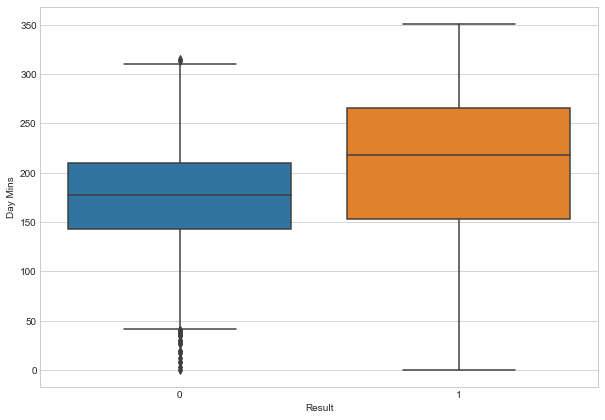

In [26]:
plt.figure(figsize = (10,7))
sns.boxplot(x = dfchurn['Result'], y = dfchurn['Day Mins'])
plt.show()

In [27]:
plt.close()

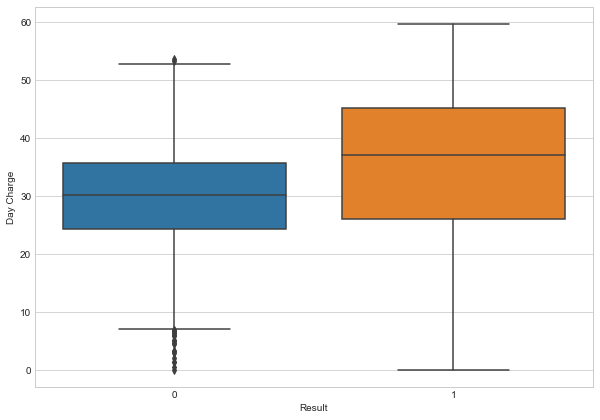

In [28]:
plt.figure(figsize = (10,7))
sns.boxplot(x = dfchurn['Result'], y = dfchurn['Day Charge'])
plt.show()

In [29]:
plt.close()

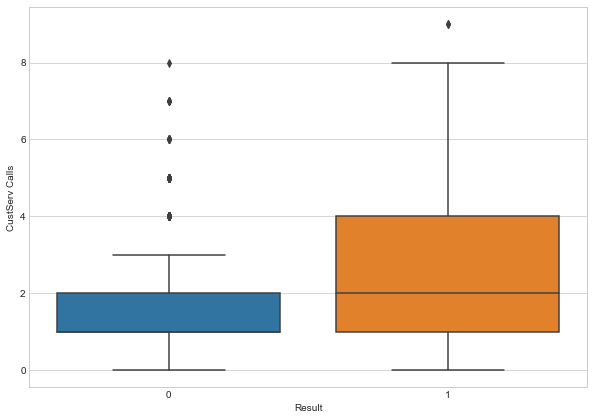

In [30]:
plt.figure(figsize = (10,7))
sns.boxplot(x = dfchurn['Result'], y = dfchurn['CustServ Calls'])
plt.show()

#### Question 5

In [31]:
import random

In [32]:
dfchurn['Int\'l Plan'] = (dfchurn['Int\'l Plan'] == 'yes').astype(int)

In [33]:
dfchurn['VMail Plan'] = (dfchurn['VMail Plan'] == 'yes').astype(int)

In [34]:
dfchurn

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Result
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
5,AL,118,510,391-8027,1,0,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False.,0
6,MA,121,510,355-9993,0,1,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False.,0
7,MO,147,415,329-9001,1,0,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False.,0
8,LA,117,408,335-4719,0,0,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False.,0
9,WV,141,415,330-8173,1,1,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False.,0


In [35]:
to_drop = ['State', 'Area Code', 'Phone', 'Churn?']
data = dfchurn.drop(to_drop, axis = 1)
testIndex = random.sample(range(0,len(data)), 1000)
X_test = data[data.index.isin(testIndex)].as_matrix()[:,:-1].astype(np.float)
y_test = data[data.index.isin(testIndex)].as_matrix()[:,-1]
X_train = data[~data.index.isin(testIndex)].as_matrix()[:,:-1].astype(np.float)
y_train = data[~data.index.isin(testIndex)].as_matrix()[:,-1]

In [36]:
print X_test.shape, X_train.shape, y_test.shape, y_train.shape

(1000L, 17L) (2333L, 17L) (1000L,) (2333L,)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
Metrics = ['euclidean', 'minkowski', 'cosine', 'chebyshev', 'canberra', 'braycurtis']
K = [5,15,25,50,100]
Weights = ['uniform', 'distance']
Combo = list(itertools.product(K,Weights, Metrics))
len(Combo)

60

In [39]:
highest = 0
chosen = ()
for c inco Combo:
    k = c[0]
    weight = c[1]
    met = c[2]
    clf = neighbors.KNeighborsClassifier(k, weights = weight, metric = met)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    if accuracy > highest:
        highest = accuracy
        chosen = c

print 'k = %i, weight = %s, metrics = %s, accuracy = %f' %(chosen[0], chosen[1], chosen[2], highest)
clf = neighbors.KNeighborsClassifier(chosen[0], weights = chosen[1], metric = chosen[2])
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
matrix = metrics.confusion_matrix(y_test,yhat)
print metrics.classification_report(y_test,yhat)

k = 15, weight = uniform, metrics = braycurtis, accuracy = 0.911000
             precision    recall  f1-score   support

        0.0       0.91      1.00      0.95       858
        1.0       0.98      0.38      0.55       142

avg / total       0.92      0.91      0.89      1000



Confusion matrix, without normalization
[[857   1]
 [ 88  54]]


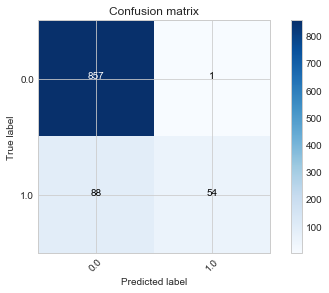

In [40]:
plt.figure()
plot_confusion_matrix(matrix, classes = np.unique(y_test))
plt.show()

We transform all yes-no attribute into binary attributes. We dropped all the unnecessary variables: state, phone, area-code and Churn? (Churn has already been replaced by Result). After that we standardized the data set, so that all attributes are within the same range! After looping through 60 combinations of options, we choose the option that gives the highest accuracy on the test set, which is k = 5, weight = uniform, metrics = braycurtis, accuracy = 0.895000.


As we can see in the Confusion Matrix: we did a bad job in classifying leaving customers. In particular, we misclassified 85 leaving customers as staying customers, and only correctly predict 68 leaving customers. Our recall is lower than 0.5

#### Question 6

In [41]:
criterion = ['gini', 'entropy']
max_depth = [5,10,15,20,25]
min_samples_leaf = [5,10,15,20]
combine = list(itertools.product(criterion,max_depth,min_samples_leaf))
len(combine)

40

In [42]:
highest = 0
chosen = ()
for c in combine:
    DTree = DecisionTreeClassifier(criterion = c[0], max_depth = c[1], min_samples_leaf = c[2])
    DTree.fit(X_train,y_train)
    yhat = DTree.predict(X_test)
    accuracytest = DTree.score(X_test,y_test)
    if accuracytest > highest:
        highest = accuracytest
        chosen = c
DTree = DecisionTreeClassifier(criterion = chosen[0], max_depth = chosen[1], min_samples_leaf = chosen[2])
DTree.fit(X_train,y_train)
yhat = DTree.predict(X_test)
accuracytrain = DTree.score(X_train,y_train)
accuracytest = highest
print 'criterion = %s, max_depth = %i, min_samples_leaf = %i' % (chosen[0], chosen[1], chosen[2])
print 'accurary on training set = %f, accuracy on test set = %f' % (accuracytrain, accuracytest)
matrix = metrics.confusion_matrix(y_test, yhat)
print metrics.classification_report(y_test, yhat)

criterion = gini, max_depth = 15, min_samples_leaf = 5
accurary on training set = 0.961852, accuracy on test set = 0.948000
             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97       858
        1.0       0.86      0.75      0.80       142

avg / total       0.95      0.95      0.95      1000



Confusion matrix, without normalization
[[840  18]
 [ 35 107]]


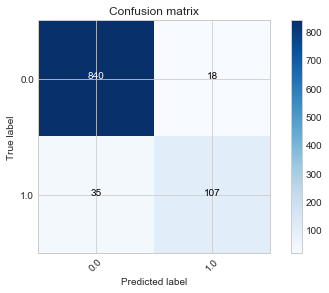

In [43]:
plt.figure()
plot_confusion_matrix(matrix,classes = np.unique(y_test))
plt.show()

We did a better job this time in classifying leaving customers and only misclassify 57 leaving customer as staying. We also do a slightly better job in predicting staying customers, only misclassify 14 staying customers. Decision Tree is much faster than kNN and has a much better result!

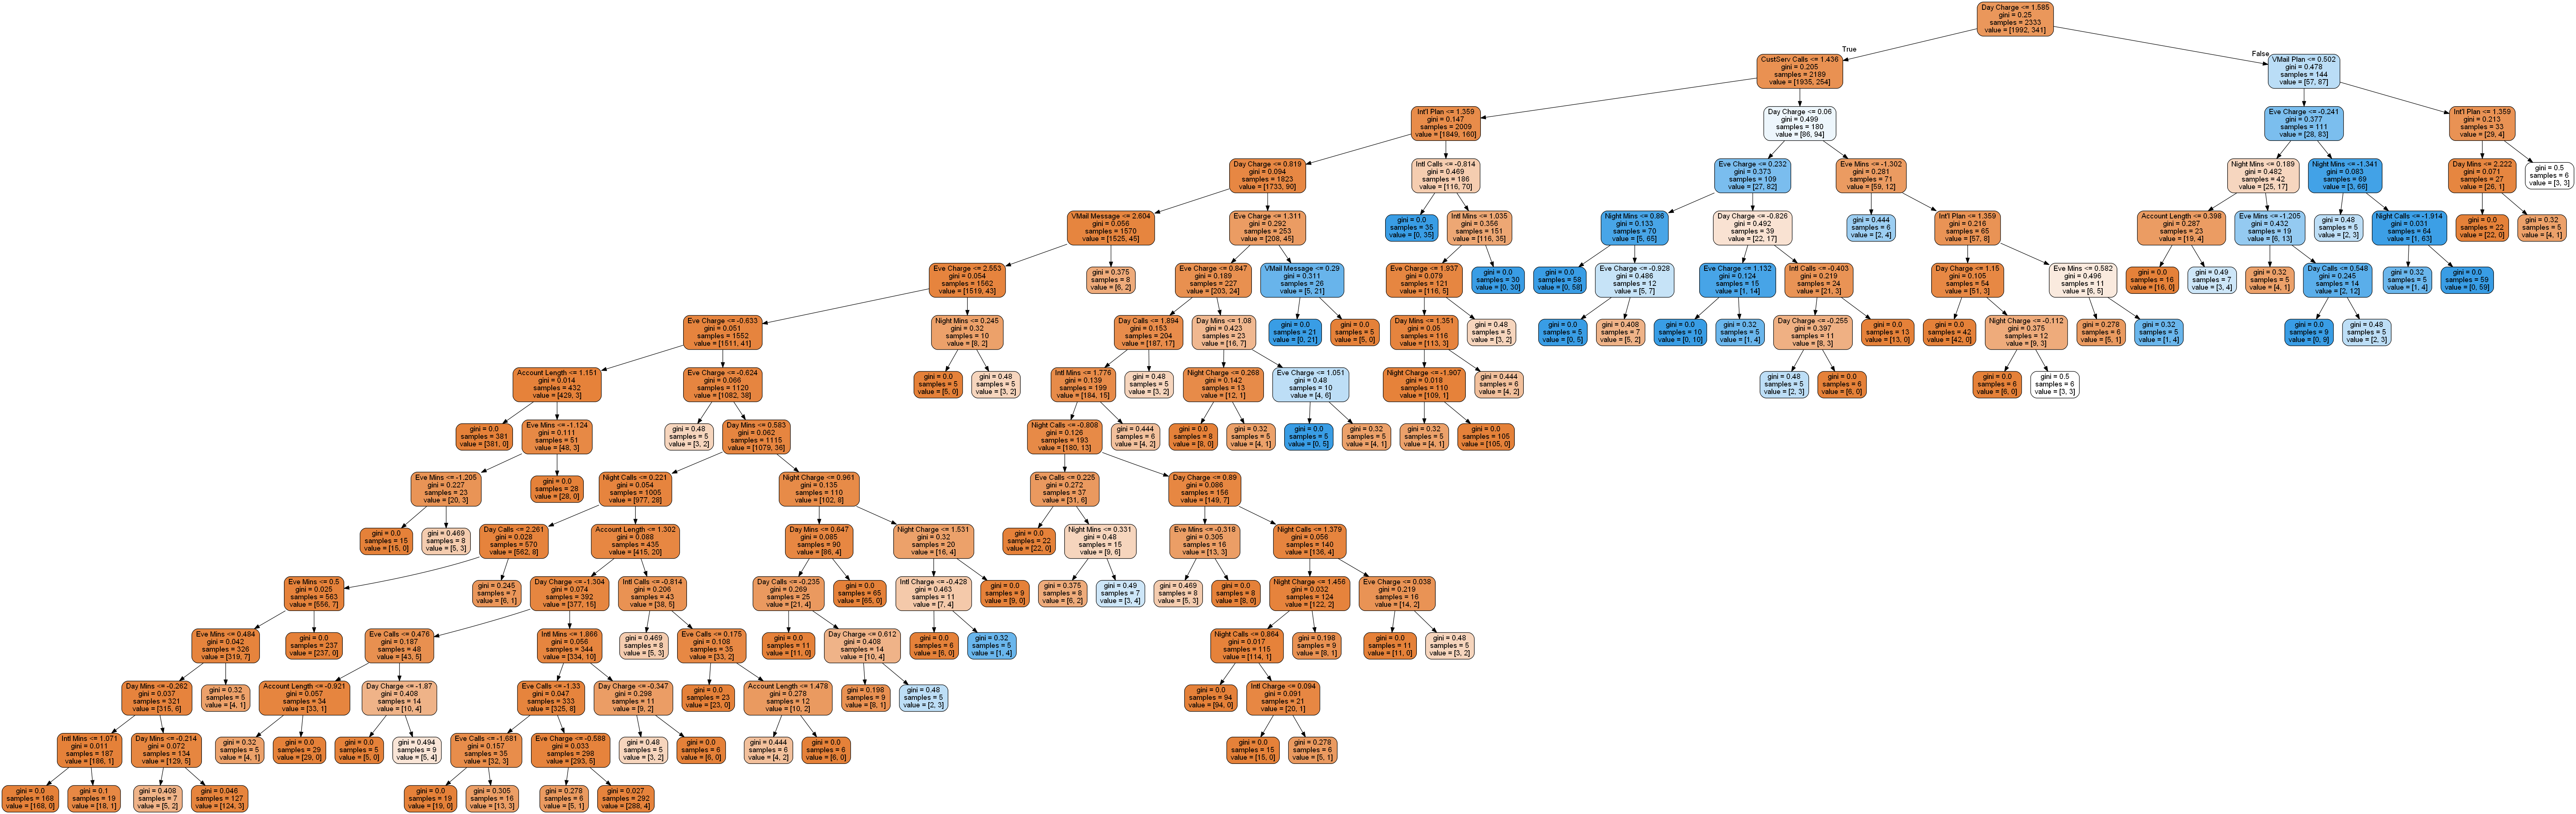

In [44]:
tree.export_graphviz(DTree, out_file = 'tree.dot', feature_names = data.columns.tolist()[:-1], filled = True, rounded = True)
graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
Image(graph.create_png())

#### Question 7

* Using kNN result, we will contact 88 customers, costing \$880. Since only 68 of them are leaving, we gain $2040 in returns. We will save \$1160 in profits


* Using the Decision Tree result, we will contact 110 customers, costing \$1100 . Since 96 of them are leaving, we gain \$2880 in returns. To sum up, we gain $1780. 


* Base on profits analysis, we should use Decision Tree

Let's try Cross Validation together with Decision Tree and Random Forest!

In [45]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.cross_validation import KFold

In [46]:
X = data.as_matrix()[:,:-1].astype(np.float)
y = data.as_matrix()[:,-1]

Here we're using Cross Validation! It is somewhat expensive, but the advantage is that we can make use of the whole dataset to make prediction

In [47]:
def run_cv(X,y,clf_class,**kwargs):
    kf = KFold(len(y),n_folds = 5, shuffle = True)
    yhat = y.copy()
    
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        yhat[test_index] = clf.predict(X_test)
    return yhat

In [48]:
def simulation(n,X, y, algorithm,combo):
    model = []
    for i in range(n):
        highest = 0
        for c in combo:
            if algorithm == RF:
                y_pred = run_cv(X, y, RF, n_estimators = c[0], criterion = c[1], max_depth = c[2], min_samples_leaf = c[3])
            elif algorithm == DecisionTreeClassifier:
                y_pred = run_cv(X,y,DecisionTreeClassifier, criterion = c[0], max_depth = c[1], min_samples_leaf = c[2])
            elif algorithm == GBC: 
                y_pred = run_cv(X,y,GBC,loss = c[0],n_estimators = c[1], max_depth = c[2])
            accuracy = np.mean(y_pred == y)
            if accuracy > highest:
                highest = accuracy
                yhat = y_pred
                params = c
        model.append((highest, yhat, params))
    model = sorted(model, key = lambda x: x[0], reverse = True)
    return model[0]

In [49]:
n_estimators = [5,10,15,20]
criterion = ['gini', 'entropy']
max_depth = [5,10,15,20]
min_samples_leaf = [5,10,15]
ForestCom = list(itertools.product(n_estimators, criterion,max_depth,min_samples_leaf))
len(ForestCom)

96

In [50]:
accuracy, yhat, params = simulation(30, X, y, RF, ForestCom)

print 'number of trees = %i, criterion = %s, max_depth = %i, min_samples_leaf = %i' % (params[0], params[1], params[2], params[3])
print 'accurary = %f' % accuracy
matrix = metrics.confusion_matrix(y, yhat)
print metrics.classification_report(y, yhat)

number of trees = 15, criterion = entropy, max_depth = 15, min_samples_leaf = 5
accurary = 0.953195
             precision    recall  f1-score   support

        0.0       0.95      0.99      0.97      2850
        1.0       0.94      0.72      0.82       483

avg / total       0.95      0.95      0.95      3333



Confusion matrix, without normalization
[[2828   22]
 [ 134  349]]


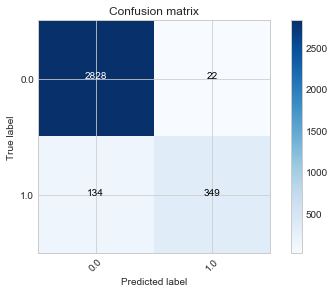

In [51]:
plt.figure()
plot_confusion_matrix(matrix,classes = np.unique(y))
plt.show()

In [52]:
accuracy, yhat, params = simulation(30, X, y, DecisionTreeClassifier, combine)

print 'criterion = %s, max_depth = %i, min_samples_leaf = %i' % (params[0], params[1], params[2])
print 'accurary = %f' % accuracy
matrix = metrics.confusion_matrix(y, yhat)
print metrics.classification_report(y, yhat)

criterion = gini, max_depth = 15, min_samples_leaf = 10
accurary = 0.946595
             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97      2850
        1.0       0.88      0.73      0.80       483

avg / total       0.94      0.95      0.94      3333



Confusion matrix, without normalization
[[2803   47]
 [ 131  352]]


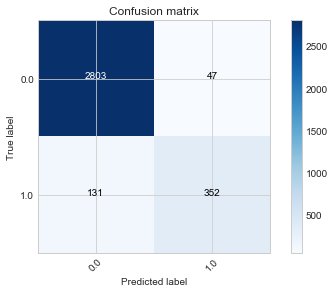

In [53]:
plt.figure()
plot_confusion_matrix(matrix,classes = np.unique(y_test))
plt.show()

In the end, Random Forest together with Cross Validation gives us the highest accuracy on the whole dataset! Decision Tree with Cross Validation is also very good, a very close win for Random Forest! In terms of profits, if we are to use Random Forest Classifier on the whole dataset, we pay \$3830 to contact customers to prevent churn, in returns, we keep 350 customers and get a pay back of \$10500. In total, we gain \$6670, that is a lot of money! Still, since we are unable to identify 133 leaving customers, we are unable to get another \$2660 in profits (133 x 30 - 133 x 10)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [55]:
loss = ['deviance', 'exponential']
max_depth = [2,3]
estimators = [100,150]
GradientCombo = list(itertools.product(loss,estimators,max_depth))

In [56]:
accuracy, yhat, params = simulation(30, X, y, GBC, GradientCombo)

print 'loss = %s, estimators = %i, max_depth = %i' % (params[0], params[1], params[2])
print 'accuracy = %f' % accuracy
matrix = metrics.confusion_matrix(y, yhat)
print metrics.classification_report(y, yhat)

loss = deviance, estimators = 150, max_depth = 3
accuracy = 0.955896
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97      2850
        1.0       0.92      0.76      0.83       483

avg / total       0.95      0.96      0.95      3333



Confusion matrix, without normalization
[[2819   31]
 [ 116  367]]


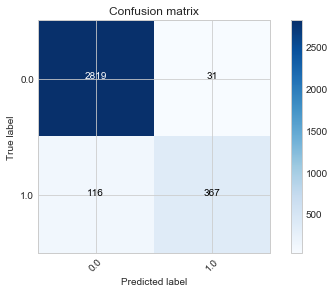

In [57]:
plt.figure()
plot_confusion_matrix(matrix, classes = np.unique(y))
plt.show()